In [610]:
#tensorflow 0.11 

In [179]:
# Original link
#https://towardsdatascience.com/learn-word2vec-by-implementing-it-in-tensorflow-45641adaf2ac 0.12

In [180]:
import numpy as np

In [181]:
import tensorflow as tf

In [182]:
#corpus = 'He is the king. The king is royal. She is the royal queen'

In [422]:
#corpus = 'rock cab ren cab  us cab  howagirepiguroscom wig  stochost street  skipholt street 11022010m ski bansko ski 2008 paddle  gf paddle  olivier trolleybus' 

In [609]:
#Real-dataset
#with open('ready-r.txt', 'r') as myfile:
#corpus = myfile.read()

In [611]:
# dummy-dataset 
with open('ready-small.txt', 'r') as myfile:
    corpus = myfile.read()

In [613]:
#convert to lower case
corpus= corpus.lower()
#print corpus 

In [614]:
words = []
for word in corpus.split():
    # because we dont want to treat "." as word 
    if word != '.':
        words.append(word)

In [615]:
print words

['rock', 'cab', 'ren', 'cab', 'us', 'cab', 'howagirepiguroscom', 'wig', 'stochost', 'street', 'skipholt', 'street', '11022010vm', 'ski', 'bansko', 'ski', '2008', 'paddle', 'gf', 'paddle', 'olivier', 'trolleybus', 'victoria', 'trolleybus', 'arriva', 'trolleybus', '38', 'trolleybus', 'lt7', 'trolleybus', 'ia', 'pay-phone', 'jordi', 'electric', 'verdugo', 'electric', 'karsts', 'racket', 'imaging', 'medicine', 'allshots', 'medicine', 'allshots', 'medicine', 'imaging', 'medicine', '20', 'cheetah', 'mtr', 'cheetah', 'mtr', 'cheetah', '20', 'cheetah', '25', 'cheetah', 'barre', 'trolleybus', 'bus', 'trolleybus', 'top', 'trolleybus', '5303', 'trolleybus', 'stop', 'tobacco', 'trespass', 'tobacco', 'property', 'tobacco', 'private', 'tobacco', 'no', 'tobacco', 'herrin', 'candle', 'baby', 'candle', 'coffee', 'street']


In [617]:
words =set(words)# so that all duplicate word are removed
print words

set(['wig', 'karsts', 'skipholt', 'private', 'gf', 'street', 'paddle', 'jordi', 'ia', 'candle', '25', 'lt7', 'no', 'top', 'bansko', 'ren', 'barre', 'verdugo', 'medicine', 'cheetah', 'racket', 'ski', '11022010vm', 'stochost', 'coffee', 'electric', 'pay-phone', 'bus', 'olivier', 'stop', 'victoria', 'herrin', 'imaging', 'baby', '20', 'howagirepiguroscom', '38', 'tobacco', 'trespass', 'mtr', 'trolleybus', '5303', 'us', 'allshots', 'rock', 'cab', '2008', 'property', 'arriva'])


In [618]:
word2int={}
int2word={}
vocab_size = len(words) #given the total number of unique words
print vocab_size

49


In [619]:
for i, word in enumerate(words):
    word2int[word] = i 
    int2word[i] = word

In [620]:
print word2int

{'wig': 0, 'karsts': 1, 'coffee': 24, 'private': 3, 'gf': 4, 'street': 5, 'bansko': 14, 'jordi': 7, 'ia': 8, 'candle': 9, '25': 10, 'lt7': 11, 'no': 12, 'top': 13, 'paddle': 6, 'ren': 15, 'barre': 16, 'verdugo': 17, 'medicine': 18, 'cheetah': 19, 'racket': 20, 'ski': 21, '11022010vm': 22, 'stochost': 23, 'skipholt': 2, 'electric': 25, 'pay-phone': 26, 'bus': 27, 'rock': 44, 'stop': 29, 'victoria': 30, 'herrin': 31, 'imaging': 32, 'baby': 33, '20': 34, 'howagirepiguroscom': 35, '38': 36, 'tobacco': 37, 'trespass': 38, 'mtr': 39, 'trolleybus': 40, '5303': 41, 'us': 42, 'allshots': 43, 'olivier': 28, 'cab': 45, '2008': 46, 'property': 47, 'arriva': 48}


In [191]:
#print (word2int['queen'])

In [621]:
print(int2word[2])

skipholt


In [623]:
# raw sentences is a list of sentences.
raw_sentences = corpus.split('.')
#print raw_sentences

In [455]:
sentences = []

In [456]:
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [440]:
#print sentences

In [197]:
######### generate the tranining data

In [625]:
data = []
WINDOW_SIZE = 1

In [626]:
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index- WINDOW_SIZE, 0): min(word_index + WINDOW_SIZE, len(sentences)) + 1]:
            if nb_word !=word:
                data.append([word, nb_word])

In [443]:
#print (data)

In [627]:
## word2int
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [628]:
#input word
x_train = []
#output word
y_train = []

In [629]:
for data_word in data:
    x_train.append(to_one_hot(word2int[data_word[0]], vocab_size))
    y_train.append(to_one_hot(word2int[data_word[1]], vocab_size))

In [630]:
# convert them to numpy arrays 
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [205]:
#print (x_train)

In [631]:
print (x_train.shape, y_train.shape)

((3, 49), (3, 49))


In [207]:
### Tensorflow model

In [632]:
# placeholder for x_train, y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))   

In [209]:
### Convert it ot Embedded repersention 

In [633]:
EMBEDDING_DIM = 32
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))
hidden_representation = tf.add(tf.matmul(x,W1),b1)

In [634]:
W2= tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2= tf.Variable(tf.random_normal([vocab_size]))

In [635]:
prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

In [636]:
print prediction 

Tensor("Softmax_15:0", shape=(?, 49), dtype=float32)


In [214]:
# the idea is
# input_one_hot ----> embeded repsention ----> predicted_neighbour_prob
# predicted_prob will be compared against a one hot vector ot correct it 

In [637]:
## train 
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [638]:
# define loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

In [639]:
# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

In [640]:
n_iters = 1000

In [641]:
# train for n_iters
for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is :', sess.run(cross_entropy_loss,feed_dict={x: x_train, y_label: y_train}))

('loss is :', 7.1039696)
('loss is :', 3.1486075)
('loss is :', 1.49712)
('loss is :', 0.42116228)
('loss is :', 0.11540553)
('loss is :', 0.076709874)
('loss is :', 0.05862589)
('loss is :', 0.04790947)
('loss is :', 0.04074901)
('loss is :', 0.035595626)
('loss is :', 0.031693038)
('loss is :', 0.028625816)
('loss is :', 0.026145352)
('loss is :', 0.024094054)
('loss is :', 0.022366496)
('loss is :', 0.020889625)
('loss is :', 0.019610932)
('loss is :', 0.018491967)
('loss is :', 0.017503534)
('loss is :', 0.016623475)
('loss is :', 0.015834246)
('loss is :', 0.015122064)
('loss is :', 0.014475691)
('loss is :', 0.013886392)
('loss is :', 0.0133463405)
('loss is :', 0.012849588)
('loss is :', 0.012390944)
('loss is :', 0.011966069)
('loss is :', 0.011571103)
('loss is :', 0.01120308)
('loss is :', 0.010859127)
('loss is :', 0.010536798)
('loss is :', 0.010234357)
('loss is :', 0.009949632)
('loss is :', 0.009681297)
('loss is :', 0.009427669)
('loss is :', 0.0091877915)
('loss is :',

('loss is :', 0.0009572894)
('loss is :', 0.0009550221)
('loss is :', 0.0009526356)
('loss is :', 0.0009503286)
('loss is :', 0.0009480415)
('loss is :', 0.0009457544)
('loss is :', 0.0009434872)
('loss is :', 0.00094118016)
('loss is :', 0.000938913)
('loss is :', 0.00093670544)
('loss is :', 0.00093451777)
('loss is :', 0.00093225064)
('loss is :', 0.0009299835)
('loss is :', 0.0009278357)
('loss is :', 0.0009256084)
('loss is :', 0.0009234207)
('loss is :', 0.0009212331)
('loss is :', 0.0009190853)
('loss is :', 0.00091687776)
('loss is :', 0.0009147897)
('loss is :', 0.0009126418)
('loss is :', 0.00091053377)
('loss is :', 0.0009083462)
('loss is :', 0.0009063178)
('loss is :', 0.00090417004)
('loss is :', 0.0009021017)
('loss is :', 0.00090003357)
('loss is :', 0.0008979255)
('loss is :', 0.0008959368)
('loss is :', 0.00089388853)
('loss is :', 0.00089178054)
('loss is :', 0.0008897919)
('loss is :', 0.00088772364)
('loss is :', 0.0008858146)
('loss is :', 0.00088378607)
('loss is

('loss is :', 0.00048677507)
('loss is :', 0.0004861787)
('loss is :', 0.00048554258)
('loss is :', 0.0004850655)
('loss is :', 0.0004843499)
('loss is :', 0.0004837933)
('loss is :', 0.0004831572)
('loss is :', 0.00048260062)
('loss is :', 0.00048200425)
('loss is :', 0.0004814079)
('loss is :', 0.00048077185)
('loss is :', 0.0004802152)
('loss is :', 0.00047957912)
('loss is :', 0.00047898278)
('loss is :', 0.0004784262)
('loss is :', 0.00047786962)
('loss is :', 0.00047727328)
('loss is :', 0.00047667697)
('loss is :', 0.00047612036)
('loss is :', 0.00047544448)
('loss is :', 0.00047488793)
('loss is :', 0.00047429153)
('loss is :', 0.00047377474)
('loss is :', 0.00047317837)
('loss is :', 0.00047262185)
('loss is :', 0.00047202548)
('loss is :', 0.0004714291)
('loss is :', 0.0004708726)
('loss is :', 0.00047027622)
('loss is :', 0.00046975943)
('loss is :', 0.00046916306)
('loss is :', 0.00046860648)
('loss is :', 0.00046801017)
('loss is :', 0.00046749334)
('loss is :', 0.00046693

In [642]:
print(sess.run(W1))
print('---------')
print(sess.run(b2))
print('----------')

[[ 0.58935124  1.0408211  -2.4292607  ...  0.22997354 -0.58444434
   0.22225617]
 [ 1.6269656  -0.8292034  -1.6641215  ...  0.28904524  0.007666
  -1.9845767 ]
 [-0.64045954  0.8657506   1.0217656  ...  0.21995074  0.22235084
   1.3523256 ]
 ...
 [-0.8344641   0.14985071 -0.2612256  ... -0.9055453  -0.06963025
  -0.8659726 ]
 [ 0.99214697  2.5805023   1.1318874  ... -1.2854148  -2.1675284
  -0.5472777 ]
 [ 0.28181374 -2.0956283   0.7776394  ... -0.21198593 -0.5371631
   2.764285  ]]
---------
[-0.32596275  0.8019626  -0.02049618  0.9070745   0.4153065  -0.17645511
 -0.0711951  -0.91560596  0.76539356 -2.0477564  -0.32181692 -0.6675958
 -1.6671294  -0.03500143  1.0436639   0.29490325  1.3494583   0.8924766
 -0.8871145  -1.1151559   2.285315    0.02877401 -1.388479    0.99555314
  0.49690413 -0.5602916   1.0003392  -0.05481612  1.0800093  -0.4776711
 -0.21856356  0.63997847  0.74782085  1.3137217  -1.5182524  -0.12194966
  1.7600024  -0.758225   -0.01701235  0.82779425 -1.6130282   1.916

In [643]:
Vectors = sess.run(W1+b1)

In [644]:
print Vectors 

[[ 0.40725198  1.7711151  -2.682096   ... -0.36075586 -2.6420474
  -0.349715  ]
 [ 1.4448664  -0.09890944 -1.9169568  ... -0.30168417 -2.049937
  -2.5565479 ]
 [-0.82255876  1.5960445   0.7689303  ... -0.37077868 -1.8352523
   0.7803544 ]
 ...
 [-1.0165633   0.8801447  -0.5140609  ... -1.4962747  -2.1272333
  -1.4379437 ]
 [ 0.81004775  3.3107963   0.87905216 ... -1.8761442  -4.2251315
  -1.1192489 ]
 [ 0.09971449 -1.3653343   0.5248041  ... -0.80271536 -2.5947661
   2.192314  ]]


In [353]:
#print(Vectors[word2int['-']])

In [645]:
## getting the closet vector 
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

In [646]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1

    query_vector = vectors[word_index]

    for index, vector in enumerate(vectors):

        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):

            min_dist = euclidean_dist(vector, query_vector)
            min_index = index

    return min_index

In [282]:
#print(int2word[find_closest(word2int['-'], Vectors)])
#print(int2word[find_closest(word2int['street'], Vectors)])

In [648]:
print(int2word[find_closest(word2int['street'], Vectors)])

coffee


In [228]:
#print(int2word[find_closest(word2int['-'], Vectors)])

In [649]:
from sklearn.manifold import TSNE

In [650]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(Vectors)

In [651]:
from sklearn import preprocessing 

In [652]:
normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors,'12')

In [653]:
import matplotlib.pyplot as plt

('wig', 0.343508)
('karsts', 0.949814)
('skipholt', 0.6261979)
('private', -0.9182364)
('gf', -0.8634527)
('street', 0.53033125)
('paddle', 0.79396665)
('jordi', -0.6012235)
('ia', -0.9322683)
('candle', -0.2452813)
('25', -0.86272806)
('lt7', 0.38996524)
('no', 0.64178413)
('top', 0.008933257)
('bansko', -0.28338262)
('ren', 0.92931545)
('barre', -0.39417377)
('verdugo', -0.62548655)
('medicine', 0.20387748)
('cheetah', -0.9996823)
('racket', 0.9745068)
('ski', 0.63140476)
('11022010vm', 0.24306397)
('stochost', 0.52984655)
('coffee', 0.057962865)
('electric', 0.5302417)
('pay-phone', -0.9818368)
('bus', -0.9980767)
('olivier', 0.99981374)
('stop', 0.9842057)
('victoria', -0.69200486)
('herrin', -0.25689718)
('imaging', 0.39508885)
('baby', 0.86234784)
('20', 0.95872915)
('howagirepiguroscom', -0.91095555)
('38', 0.83120835)
('tobacco', 0.03764822)
('trespass', -0.46008766)
('mtr', 0.9939209)
('trolleybus', -0.95992607)
('5303', -0.6574323)
('us', -0.05166944)
('allshots', -0.15359795

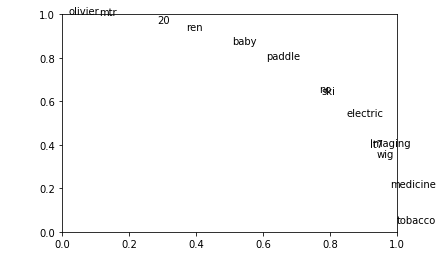

In [654]:
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()